In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Cargamos la data 

El dataset Fashion-MNIST cotiene 60,000 imagenes para el set de datos de entrenamiento y un set de datos de prueba de 10,000.

In [19]:
fashion_mnist = keras.datasets.fashion_mnist


In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Imagenes
Las imagenes son Numpy Arrays de 28x28, los pixeles estan entre los valores de 0 a 255

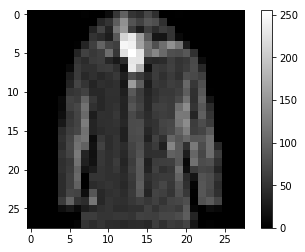

In [15]:
plt.imshow(train_images[19], cmap = 'gray')
plt.colorbar()

## Labels

In [28]:
np.unique(train_labels)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

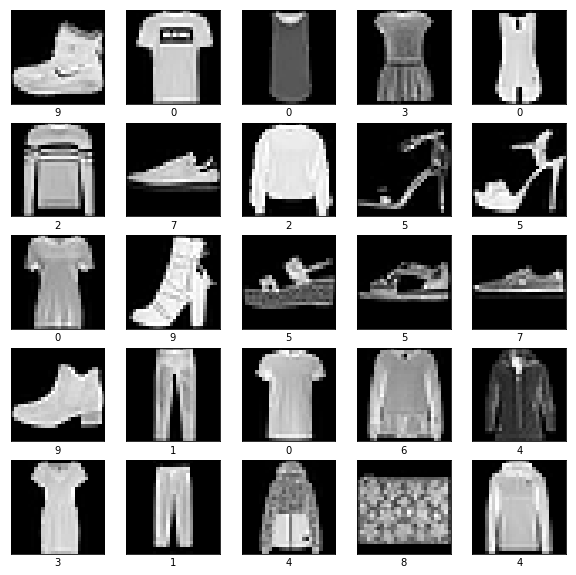

In [26]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

# Tarea

Para esta tarea se deben utilizar únicamente 3 clases, se puede escoger cualquiera de las 10 disponibles en el data set, por lo que hay que filtrar las clases elegidas en los arreglos:
- train_images
- train_labels
- test_images
- test_labels

El objetivo de la tarea es comparar la diferencia al aplicar feature scale/normalization y las features sin ninguna transformación y comparar el efecto de el scaling/normalización sobre el entrenamiento con regresión logística.
- Se debe crear un diccionario con el valor numérico de las labels y el texto correspondiente para poder relacionar el valor numérico con el valor descriptivo/textual.
- Aplicar regresión logística con entropía cruzada como función de costo, crear una función que recibe de entrada un tensor x y predice la clase(utilizar el diccionario para mostrar el texto perteneciente al label).
- Adicional a el costo(por entropía cruzada) en el grafo se debe agregar un nodo que calcule el acurracy(comparando el valor real vs el estimado por el modelo).
- El accuracy y el costo deben ser agregados a tensorboard(agregar screenshots al notebook)
- Se debe agregar al notebook un screenshot del grafo/grafos de tensorboard, simplificando(usando names y name_scope como visto en clase).
- Todo lo anterior se debe hacer tanto para datos crudos, como para datos transformados con (normalización y escalado)
- Basado en los ejemplos de visualización de imagenes en el notebook ,crear una función que reciba de entrada el tensor que representa a una imagen, grafique esta imagen poniendo como título el nombre de la prenda con mayor probabilidad.
- Utilizar la función anterior para mostrar una muestra aleatoria de 5 imágenes(y la predicción probabilistica de la prenda)
- Comparar con tensorboard las curvas de aprendizaje del entrenamiento con datos crudos vs datos transformados, y los 2 grafos y concluir/opinar al respecto usando markdown(agregando screenshots)
- Utilizar mini batch gradient descent con batch size de 32

# Analisis Exploratorio

In [44]:
## Separación de clases:

print("Dimensiones del origen de datos de Entrenamiento: \nImagenes")
print(train_images.shape)
print("Etiquetas")
print(train_labels.shape)
print()
print("Dimensiones del origen de datos de Testing: \nImagenes")
print(test_images.shape)
print("Etiquetas")
print(test_labels.shape)


Dimensiones del origen de datos de Entrenamiento: 
Imagenes
(60000, 28, 28)
Etiquetas
(60000,)

Dimensiones del origen de datos de Testing: 
Imagenes
(10000, 28, 28)
Etiquetas
(10000,)


In [58]:
## Se deja comentado ya que la información es demasiado extensa, sirvió para conocer la estructura del set.
# list(train_images)

### Definición de clases a utilizar:
Las clases que se van a utilizar son las siguientes:
- a. Dress, variable = 3
- b. Sandal, variable = 5
- c. Trouser, variable = 1

Por esa razón se crean variables con dicha asignación numérica y luego se separan en vectores individuales para cada clase.


In [78]:
constDress = 3
constSanda = 5
constTrous = 1

# Filtro por valores, en otras palabras, vector de Trues
arrDressTrue = (train_labels == constDress )
arrSandaTrue = (train_labels == constSanda )
arrTrousTrue = (train_labels == constTrous )

# Filtro en funcion de valor obtenido anteriormente de los Trues, para obtener nuevamente el valor de cada imagen
arrImgDress = train_images[arrDressTrue]
arrImgSanda = train_images[arrSandaTrue]
arrImgTrous = train_images[arrTrousTrue]


### Se crea una funcion para plotear y confirmar que los vectores anteriormente definidos, corresponden a las imagenes deseadas según su clase

In [74]:
## Funcion para graficar clases
def graficarClase(arrClase, numEtiqueta,arrEtiqueta=train_labels, a=5,b=5, rango=25) : 
    plt.figure(figsize=(10,10))

    for i in range(rango):
        plt.subplot(a,b,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(arrClase[i], cmap='gray')
        plt.xlabel(arrEtiqueta[numEtiqueta])
    plt.show()

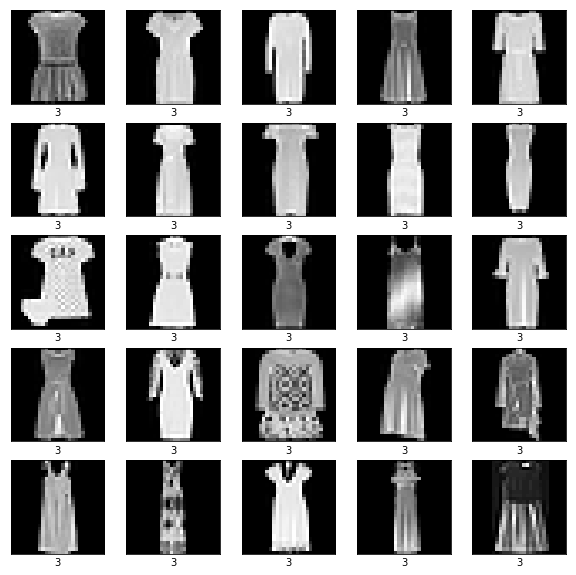

In [75]:
#Graficando imagenes de Dress:
graficarClase(arrImgDress,constDress)


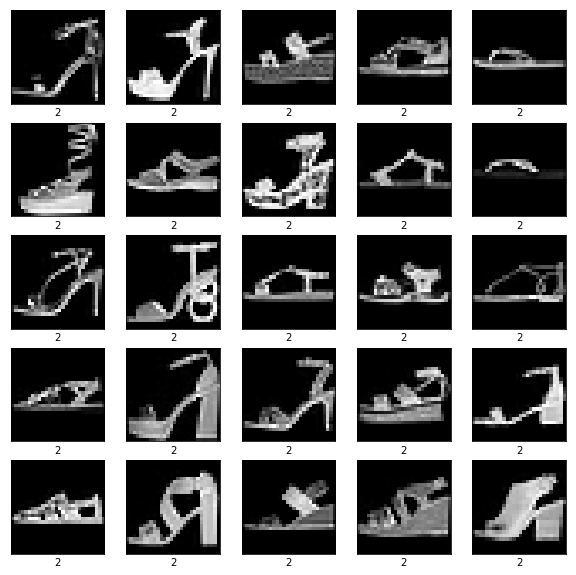

In [76]:
#Graficando imagenes de Sandal:
graficarClase(arrImgSanda,constSanda)


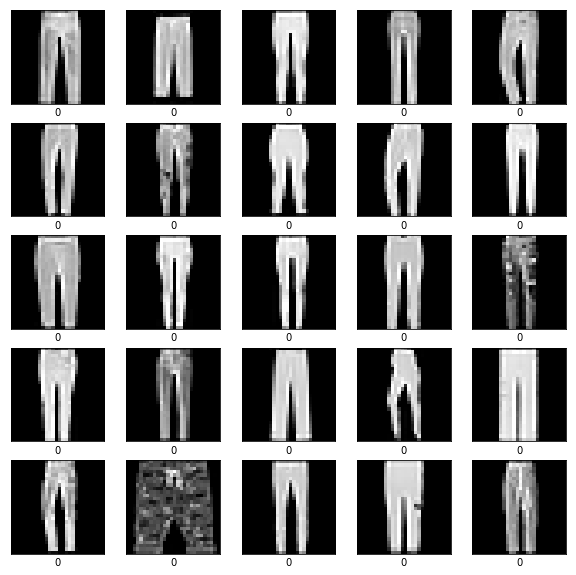

In [79]:
#Graficando imagenes de Trouser:
graficarClase(arrImgTrous,constTrous)
